### Install Required Libs

In [6]:
%pip install -r requirements.txt

In [7]:
%load_ext autoreload
%load_ext jupyter_black
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [8]:
class_map = [
    "Airplane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

show_summary = True
show_dataset_analyze = True
show_model_visualize = True
SEED = 1

### Get Available Device

In [9]:
import torch
from utils import get_device

# Check GPU availability
use_cuda, device = get_device()
print(f"Device:{device}")

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

Device:cuda


### Prepare datasets & loaders

In [10]:
# from utils import get_data_loader
from cifar10.transforms import get_album_transform
from cifar10.dataset import get_album_dataset

if use_cuda:
    kwargs = {
        "batch_size": 512,
        "shuffle": True,
        "num_workers": 4,
        "pin_memory": True,
    }
else:
    kwargs = {
        "batch_size": 256,
        "shuffle": True,
    }

train_transform = get_album_transform("train")
test_transform = get_album_transform("test")

train_loader, test_loader = get_album_dataset(train_transform, test_transform, kwargs)

100%|██████████| 170498071/170498071 [00:02<00:00, 62748218.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


## Dataset  basic Stats

In [11]:
from utils import print_dataset_bstats

if show_dataset_analyze:
    print_dataset_bstats(train_loader)

Data set size: 50000 elements
Image shape: torch.Size([3, 32, 32])
Mean: tensor([-0.2028, -0.1912, -0.1811])
Standard Deviation: tensor([1.0683, 1.0732, 1.0465])


## Calculate Class Scale

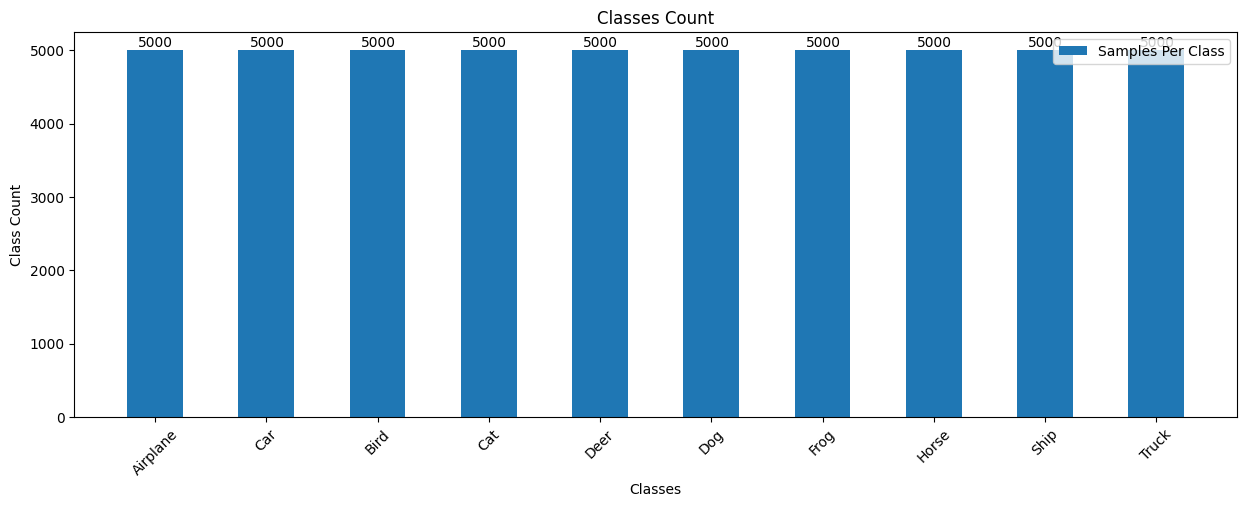

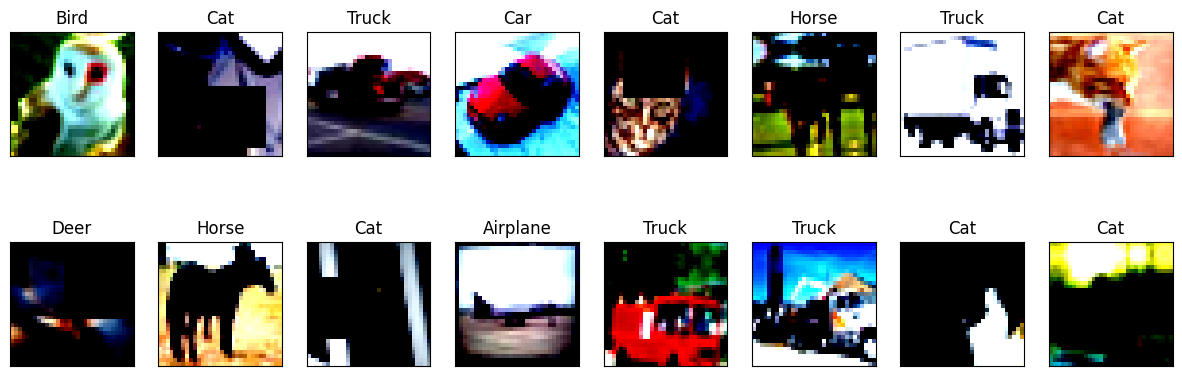

In [12]:
from visualize import print_class_scale, print_samples

if show_dataset_analyze:
    print_class_scale(train_loader, class_map)
    print_samples(train_loader, class_map)

### Save Model's Architecture as png file

In [13]:
from model import Net

if show_model_visualize:
    model = Net().to(device)
    model.model_visualize(device, train_loader, "model")

### Create and runmodel Pipeline(s)

In [14]:
import torch.nn.functional as F

from utils import get_lr_scheduler
from backpropagation import ModelTrainPipeline

dropout = 0.1
epochs = 25
enable_skip_conn = False

trained_models = []
for norm in ["bn"]:
    mtp = ModelTrainPipeline(
        criteria=F.cross_entropy,
        train_loader=train_loader,
        test_loader=test_loader,
        epochs=epochs,
        device=device,
        norm=norm,
        dropout=dropout,
        skip_connets=enable_skip_conn,
        model_summary=True,
    )

    trained_models.append(mtp)

    # Start model training.
    mtp.run()

Device: cuda:0
Normalization: bn
Dropout: 0.1
Skip Connection: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
            Conv2d-2           [-1, 32, 32, 32]              96
              ReLU-3           [-1, 32, 32, 32]               0
       BatchNorm2d-4           [-1, 32, 32, 32]              64
           Dropout-5           [-1, 32, 32, 32]               0
 DWSeparableConv2d-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]             288
            Conv2d-8           [-1, 64, 32, 32]           2,048
              ReLU-9           [-1, 64, 32, 32]               0
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
DWSeparableConv2d-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1

  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Train: Loss=2.0984 Batch_id=97 Accuracy=17.97: 100%|██████████| 98/98 [00:11<00:00,  8.83it/s]


Test set: Average loss: 2.0218, Accuracy: 2639/10000 (26.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.9832 Batch_id=97 Accuracy=24.93: 100%|██████████| 98/98 [00:11<00:00,  8.66it/s]


Test set: Average loss: 1.9347, Accuracy: 3141/10000 (31.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.0276 Batch_id=97 Accuracy=28.13: 100%|██████████| 98/98 [00:11<00:00,  8.71it/s]


Test set: Average loss: 1.8928, Accuracy: 3393/10000 (33.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.9939 Batch_id=97 Accuracy=29.65: 100%|██████████| 98/98 [00:11<00:00,  8.67it/s]


Test set: Average loss: 1.8625, Accuracy: 3524/10000 (35.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.8700 Batch_id=97 Accuracy=30.74: 100%|██████████| 98/98 [00:11<00:00,  8.60it/s]


Test set: Average loss: 1.8454, Accuracy: 3545/10000 (35.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.9706 Batch_id=97 Accuracy=31.48: 100%|██████████| 98/98 [00:11<00:00,  8.47it/s]


Test set: Average loss: 1.8352, Accuracy: 3580/10000 (35.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.8342 Batch_id=97 Accuracy=31.85: 100%|██████████| 98/98 [00:11<00:00,  8.31it/s]


Test set: Average loss: 1.8278, Accuracy: 3667/10000 (36.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.9085 Batch_id=97 Accuracy=32.26: 100%|██████████| 98/98 [00:11<00:00,  8.36it/s]


Test set: Average loss: 1.8166, Accuracy: 3669/10000 (36.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.8895 Batch_id=97 Accuracy=32.59: 100%|██████████| 98/98 [00:11<00:00,  8.18it/s]


Test set: Average loss: 1.8069, Accuracy: 3696/10000 (36.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.8606 Batch_id=97 Accuracy=32.86: 100%|██████████| 98/98 [00:11<00:00,  8.29it/s]


Test set: Average loss: 1.7977, Accuracy: 3720/10000 (37.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.9860 Batch_id=97 Accuracy=33.22: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s]


Test set: Average loss: 1.7973, Accuracy: 3780/10000 (37.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.7894 Batch_id=97 Accuracy=33.49: 100%|██████████| 98/98 [00:11<00:00,  8.29it/s]


Test set: Average loss: 1.7960, Accuracy: 3775/10000 (37.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.8218 Batch_id=97 Accuracy=33.49: 100%|██████████| 98/98 [00:11<00:00,  8.21it/s]


Test set: Average loss: 1.7888, Accuracy: 3808/10000 (38.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.9838 Batch_id=97 Accuracy=33.79: 100%|██████████| 98/98 [00:11<00:00,  8.26it/s]


Test set: Average loss: 1.7868, Accuracy: 3840/10000 (38.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.7986 Batch_id=97 Accuracy=33.97: 100%|██████████| 98/98 [00:11<00:00,  8.21it/s]


Test set: Average loss: 1.7816, Accuracy: 3834/10000 (38.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.8512 Batch_id=97 Accuracy=34.20: 100%|██████████| 98/98 [00:11<00:00,  8.18it/s]


Test set: Average loss: 1.7769, Accuracy: 3839/10000 (38.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.9450 Batch_id=97 Accuracy=33.57: 100%|██████████| 98/98 [00:12<00:00,  8.16it/s]


Test set: Average loss: 1.7769, Accuracy: 3849/10000 (38.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.8944 Batch_id=97 Accuracy=34.10: 100%|██████████| 98/98 [00:11<00:00,  8.27it/s]


Test set: Average loss: 1.7750, Accuracy: 3852/10000 (38.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.8687 Batch_id=97 Accuracy=34.08: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s]


Test set: Average loss: 1.7759, Accuracy: 3861/10000 (38.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.8943 Batch_id=97 Accuracy=34.16: 100%|██████████| 98/98 [00:11<00:00,  8.23it/s]


Test set: Average loss: 1.7753, Accuracy: 3847/10000 (38.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 21


Train: Loss=1.8629 Batch_id=97 Accuracy=34.18: 100%|██████████| 98/98 [00:11<00:00,  8.26it/s]


Test set: Average loss: 1.7741, Accuracy: 3860/10000 (38.60%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 22


Train: Loss=1.9955 Batch_id=97 Accuracy=34.13: 100%|██████████| 98/98 [00:11<00:00,  8.24it/s]


Test set: Average loss: 1.7751, Accuracy: 3847/10000 (38.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 23


Train: Loss=1.7964 Batch_id=97 Accuracy=34.34: 100%|██████████| 98/98 [00:11<00:00,  8.45it/s]


Test set: Average loss: 1.7744, Accuracy: 3857/10000 (38.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 24


Train: Loss=1.8508 Batch_id=97 Accuracy=34.16: 100%|██████████| 98/98 [00:10<00:00,  8.91it/s]


Test set: Average loss: 1.7737, Accuracy: 3866/10000 (38.66%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 25


Train: Loss=1.8690 Batch_id=97 Accuracy=34.28: 100%|██████████| 98/98 [00:10<00:00,  8.95it/s]


Test set: Average loss: 1.7731, Accuracy: 3846/10000 (38.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************


## Saving Network Architectur(e) as ONNX file

In [15]:
if show_model_visualize:
    for model in trained_models:
        model.save_model_as_onnx()

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Comparing different type of Normalizations

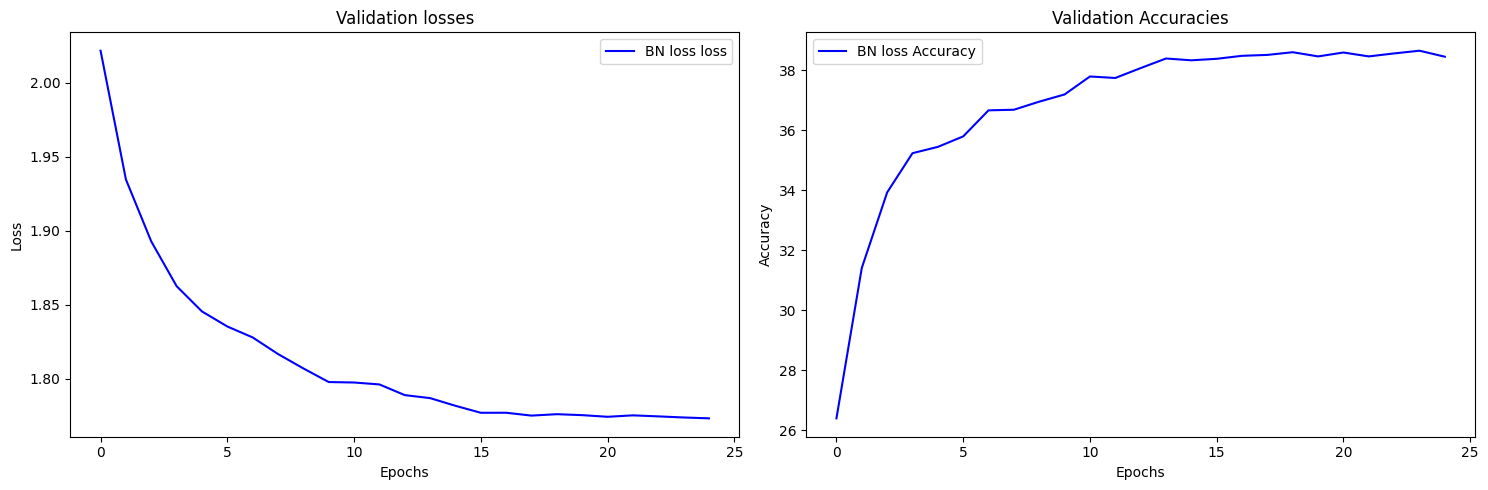

In [16]:
from visualize import plot_model_comparison

plot_model_comparison(trained_models, epochs)

## Training & Test accuracies

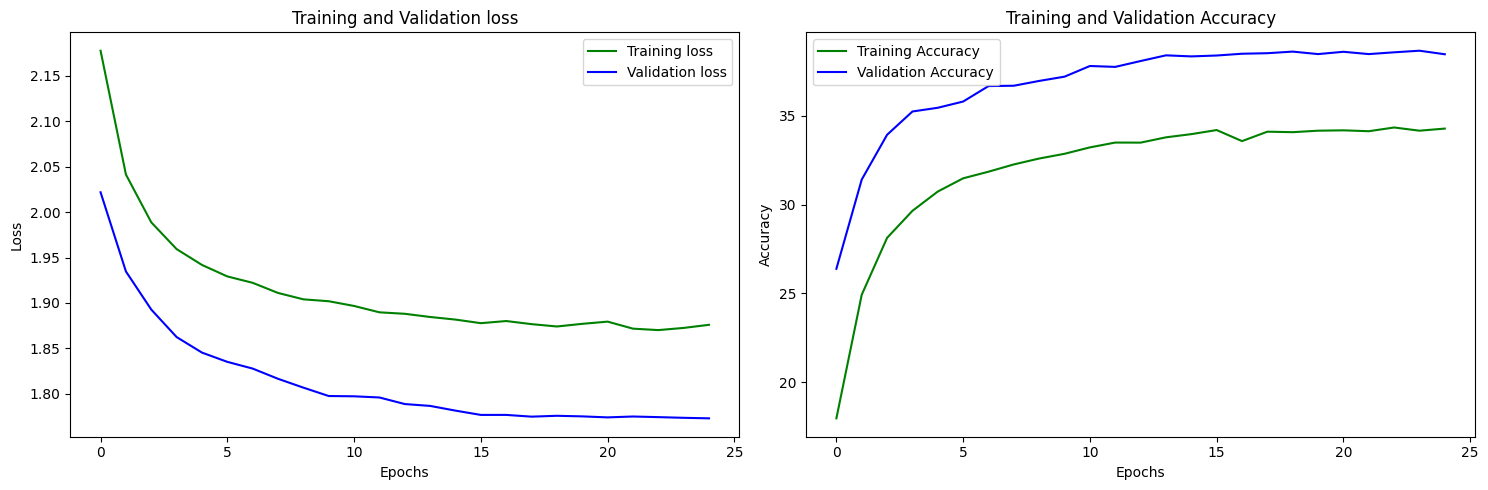

Confusion matrix, without normalization


Total Incorrect Predictions 6154


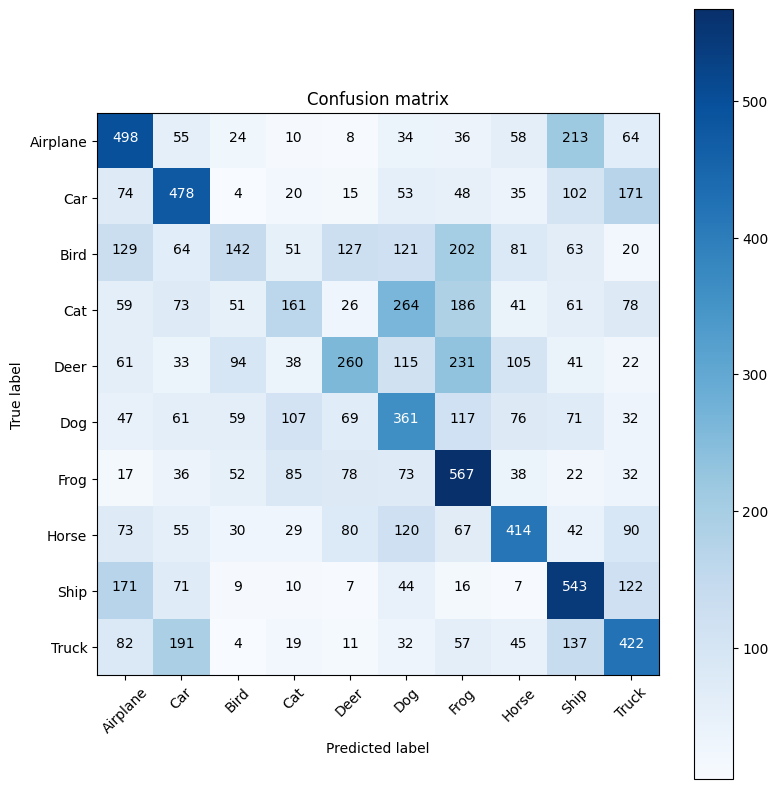

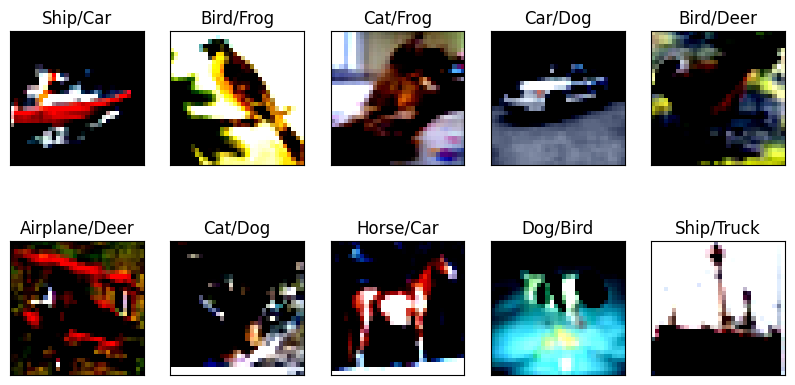

In [17]:
for trainer in trained_models:
    trainer.print_performance(class_map)